In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/paciente1/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

1619

In [7]:
with open('dataset/generado/paciente1/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

1619

In [9]:
with open('dataset/generado/paciente1/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

190

In [11]:
with open('dataset/generado/paciente1/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

190

In [13]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

96

In [15]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

96

In [17]:
array_Xtrain.shape[1],array_Xtrain.shape[2]

(30, 5)

In [48]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [49]:
array_Xtrain

array([[[0.14130435, 0.7826087 , 0.25423729, 0.6       , 0.5       ],
        [0.1326087 , 0.7826087 , 0.50847458, 0.6       , 0.5       ],
        [0.12608696, 0.7826087 , 0.76271186, 0.6       , 0.5       ],
        ...,
        [0.03913043, 0.04347826, 0.        , 0.8       , 0.        ],
        [0.03043478, 0.04347826, 0.25423729, 0.8       , 0.        ],
        [0.02826087, 0.04347826, 0.50847458, 0.8       , 0.        ]],

       [[0.1326087 , 0.7826087 , 0.50847458, 0.6       , 0.5       ],
        [0.12608696, 0.7826087 , 0.76271186, 0.6       , 0.5       ],
        [0.12826087, 0.82608696, 0.        , 0.6       , 0.5       ],
        ...,
        [0.03043478, 0.04347826, 0.25423729, 0.8       , 0.        ],
        [0.02826087, 0.04347826, 0.50847458, 0.8       , 0.        ],
        [0.03913043, 0.04347826, 0.76271186, 0.8       , 0.        ]],

       [[0.12608696, 0.7826087 , 0.76271186, 0.6       , 0.5       ],
        [0.12826087, 0.82608696, 0.        , 0.6       , 0.5

In [50]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [63]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1.h5')

Epoch 1/50
51/51 [==============================] - 1s 29ms/step - loss: 0.0548 - mae: 0.0548 - val_loss: 0.0447 - val_mae: 0.0447
Epoch 2/50
51/51 [==============================] - 1s 25ms/step - loss: 0.0503 - mae: 0.0503 - val_loss: 0.0355 - val_mae: 0.0355
Epoch 3/50
51/51 [==============================] - 1s 28ms/step - loss: 0.0502 - mae: 0.0502 - val_loss: 0.0363 - val_mae: 0.0363
Epoch 4/50
51/51 [==============================] - 1s 26ms/step - loss: 0.0525 - mae: 0.0525 - val_loss: 0.0429 - val_mae: 0.0429
Epoch 5/50
51/51 [==============================] - 2s 30ms/step - loss: 0.0494 - mae: 0.0494 - val_loss: 0.0371 - val_mae: 0.0371
Epoch 6/50
51/51 [==============================] - 2s 30ms/step - loss: 0.0492 - mae: 0.0492 - val_loss: 0.0485 - val_mae: 0.0485
Epoch 7/50
51/51 [==============================] - 1s 29ms/step - loss: 0.0468 - mae: 0.0468 - val_loss: 0.0361 - val_mae: 0.0361


3/3 [==============================] - 0s 15ms/step - loss: 0.0527 - mae: 0.0527
test loss, test acc: [0.05266094580292702, 0.05266094580292702]


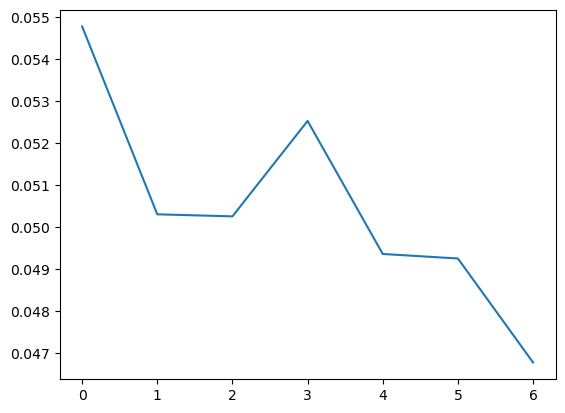

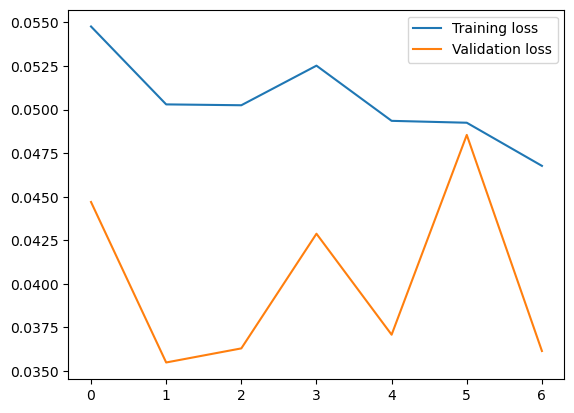

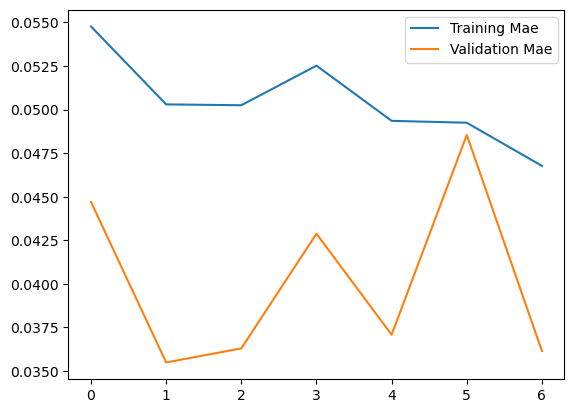

In [64]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

3/3 [==============================] - 0s 7ms/step


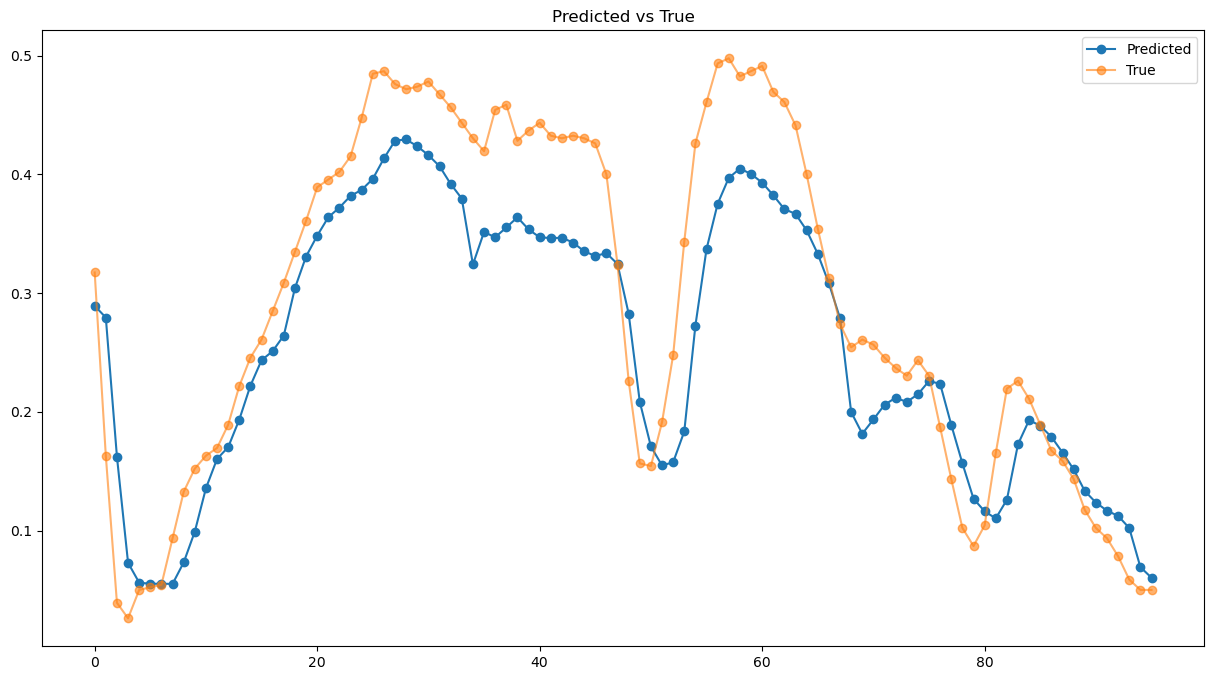

In [65]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [66]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.052660948068132984,
 'mse': 0.06382888250553535,
 'rmse': 0.004074126241905437}

In [67]:
len(array_Xtest)

96

In [68]:
len(array_Ytest)

96

# Predicción a 30 min

In [72]:
lenHorizonte=1
horizonte=[]
horizonte_array_Ytest=[]
for i in range(lenHorizonte):
    horizonte.append(array_Xtest[i]) 
    horizonte_array_Ytest.append(array_Ytest[i]) 
horizonte=np.reshape(horizonte, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))
len(horizonte)

1

In [73]:
horizonte.shape

(1, 30, 5)

1/1 [==============================] - 0s 50ms/step


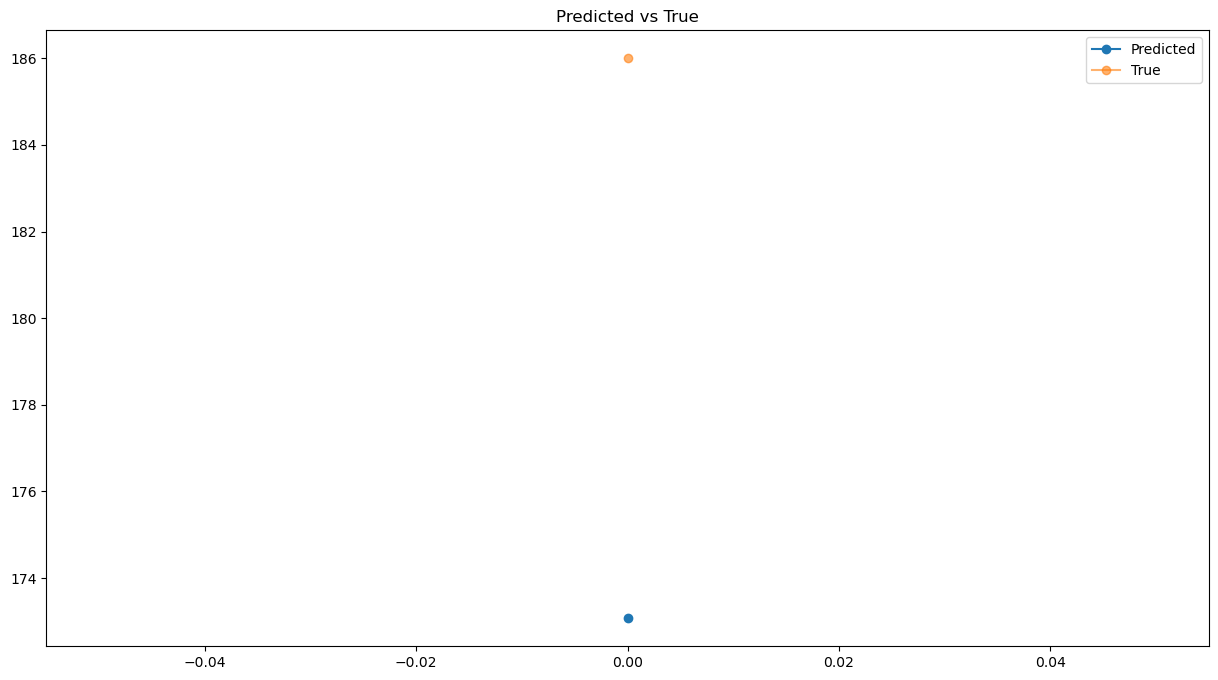

{'mae': 12.9276123046875, 'mse': 12.9276123046875, 'rmse': 167.12315990030766}

In [74]:
yhat=model_utils.predictionOverPrediction(horizonte,model)

yhat = pd.DataFrame(yhat)
horizonte_array_Ytest = pd.DataFrame(horizonte_array_Ytest)

yhat = pd.DataFrame(scalerGlucosa.inverse_transform(yhat))
horizonte_array_Ytest = pd.DataFrame(scalerGlucosa.inverse_transform(horizonte_array_Ytest))

model_utils.plotPredicted(yhat,horizonte_array_Ytest)
model_utils.forecast_accuracy(yhat,horizonte_array_Ytest)